In Chapters 4 through 6, we have discussed the considerations for developing an ML model, from creating training data, extracting features, and developing the model to crafting metrics to evaluate this model. These considerations constitute the **logic of the model**—instructions on how to go from raw data into an ML model.

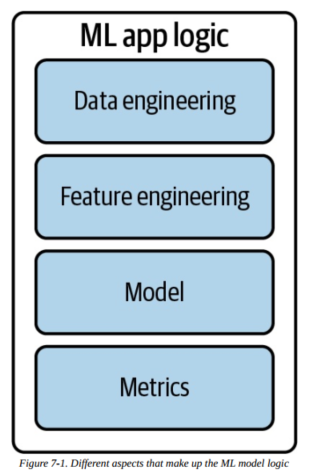

Your model can be deployed to a staging environment for testing or to a production environment to be used by your end users. In this chapter, we focus on **deploying models to production environments**.

**Deploying is easy if you ignore all the hard parts**. 

If you want to deploy a model for your friends to play with, all you have to do is to wrap your predict function in a POST request endpoint using Flask or FastAPI, put the dependencies this predict function needs to run in a container, and push your model and its associated container to a cloud service like AWS or GCP to expose the endpoint.

In [ ]:
# Example of how to use FastAPI to turn your predict function
# into a POST endpoint
@app.route('/predict', methods=['POST'])
def predict():
  X = request.get_json()['X']
  y = MODEL.predict(X).tolist()
  return json.dumps({'y': y}), 200

The **hard parts** include:
-  Making your model available to millions of users with a latency of milliseconds and 99% uptime.
- Setting up the infrastructure so that the right person can be immediately notified when something goes wrong.
- Figuring out what went wrong, and seamlessly deploying the updates to fix what’s wrong.

**Exporting a model (serialization)**: converting this model into a format that can be used by another application.

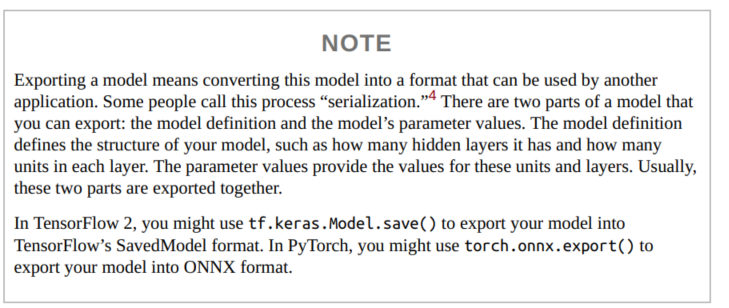

### 1. Machine Learning Deployment Myths

#### Myth 1: You Only Deploy One or Two ML Models at a Time

When doing academic projects, I was advised to choose a small problem to focus on, which usually led to a single model.

In reality, companies have many, many ML models. **An application might have many different features, and each feature might require its own model**.

Consider a ride-sharing app like Uber. It needs a model to predict each of the following elements: ride demand, driver availability, estimated time of arrival, dynamic
pricing, fraudulent transaction, customer churn, and more. Additionally, if this app operates in 20 countries, until you can have models that generalize across different user-profiles, cultures, and languages, each country would need its own set of models. So with 20 countries and 10 models for each country, you already have 200 models. 

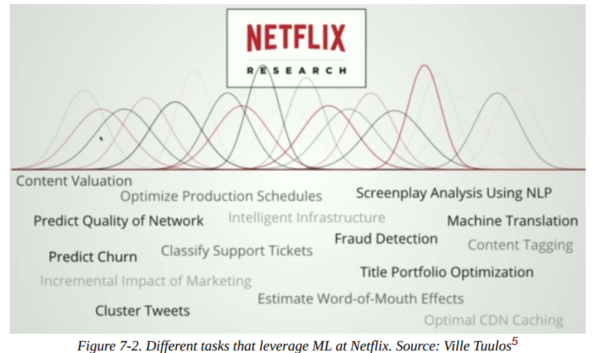

#### Myth 2: If We Don’t Do Anything, Model Performance Remains the Same

The phenomenon in which a software program degrades over time even if nothing seems to have changed is known as **“software rot” or “bit rot”**.

ML systems aren’t immune to it. On top of that, ML systems suffer from what are known as **data distribution shifts**, when the data distribution your model encounters in production is different from the data distribution it was trained on. 

Therefore, an ML model tends to **perform best right after training and to degrade over time**.

#### Myth 3: You Won’t Need to Update Your Models as Much

People tend to ask me: “How often should I update my models?” It’s the wrong question to ask. The right question should be: **“How often can I update my models?”**

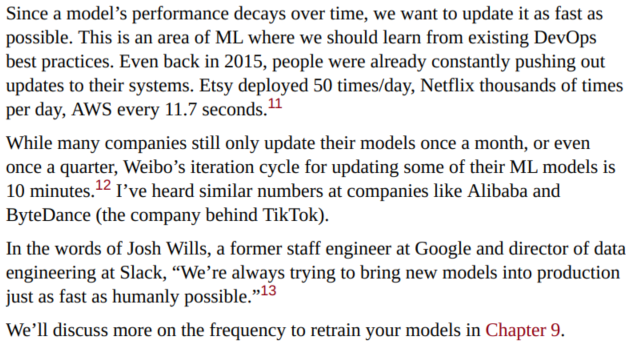

#### Myth 4: Most ML Engineers Don’t Need to Worry About Scale

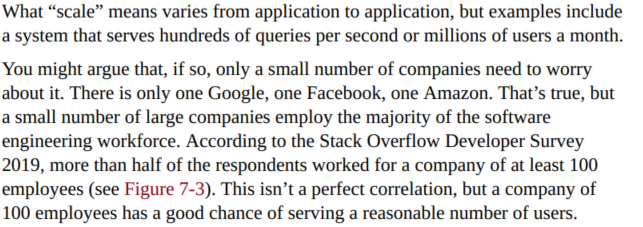

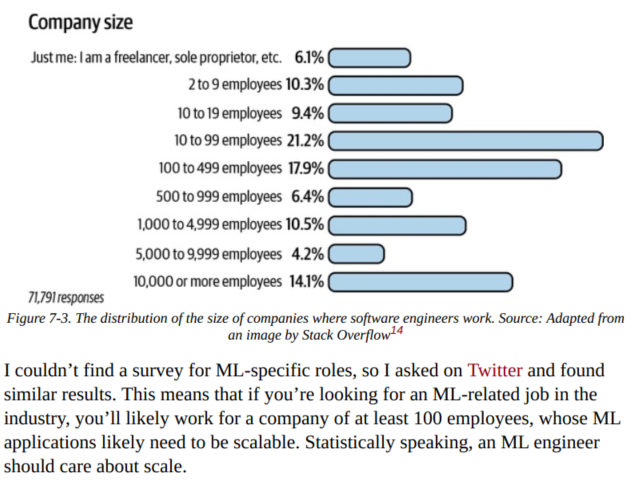

### 2. Batch Prediction Versus Online Prediction

Three main modes of prediction:
1. **Batch prediction**, which uses only **batch features**.
2. **Online prediction** that uses only **batch features** (e.g., precomputed embeddings).
3. **Online prediction** that uses both **batch features** and **streaming features**. This is also known as **streaming prediction**.

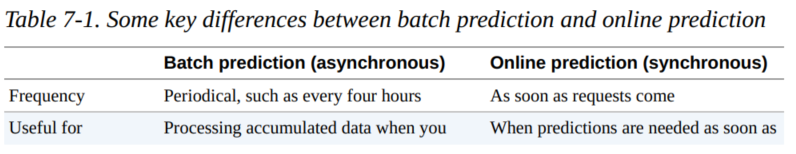

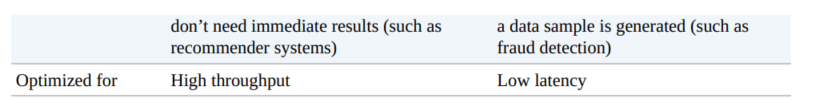

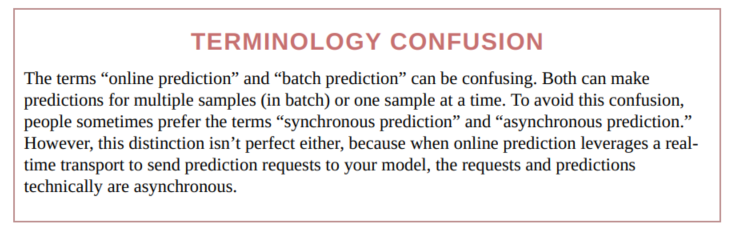

**Online prediction (on-demand prediction / synchronous prediction)**:
- When **predictions are generated and returned as soon as requests** for these predictions arrive.
- e.g. you enter an English sentence into Google Translate and get back its French translation immediately. 
- Traditionally, when doing online prediction, requests are sent to the prediction service via **RESTful APIs**.
- When **prediction requests are sent via HTTP requests**, online prediction is also known as **synchronous prediction**: predictions are generated in synchronization with requests..

**Batch prediction (asynchronous prediction)**:
- When **predictions are generated periodically or whenever triggered**.
- The predictions are stored somewhere, such as in SQL tables or an in memory database, and retrieved as needed. 
- Netflix might generate movie recommendations for all of its users every four hours, and the precomputed recommendations are fetched and shown to users when they log on to Netflix. 
- Batch prediction is also known as **asynchronous prediction**: predictions are generated asynchronously with requests.

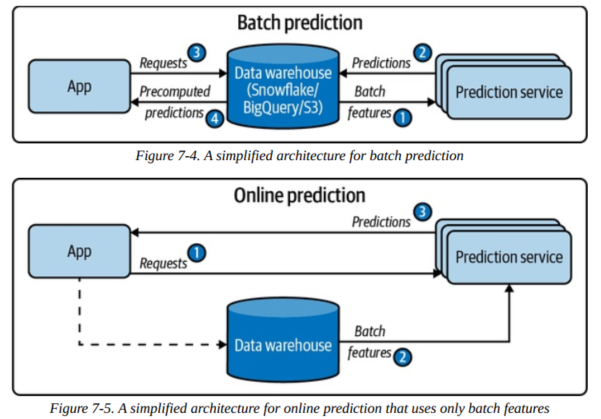

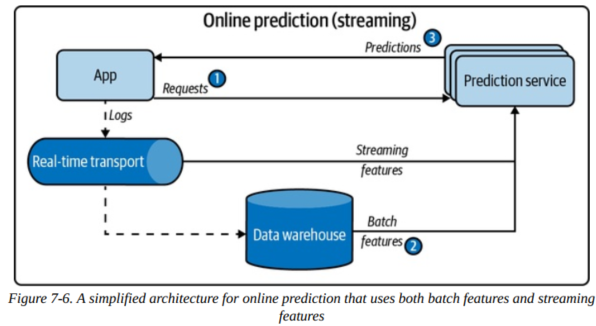

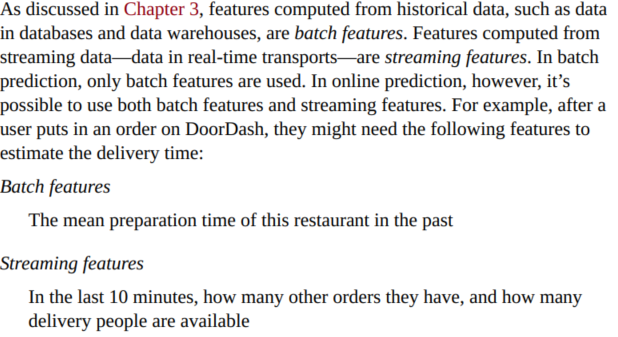

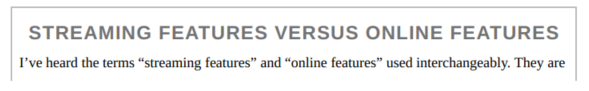

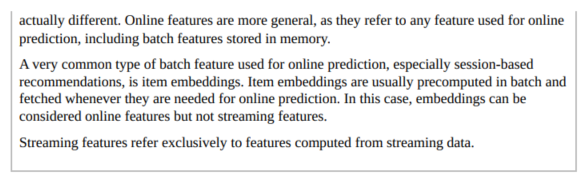

Online prediction and batch prediction don’t have to be mutually exclusive. 

One hybrid solution is that you **precompute predictions for popular queries**, then **generate predictions online for less popular queries**.

#### 2.1 From Batch Prediction to Online Prediction

#### 2.2 Unifying Batch Pipeline and Streaming Pipeline

### 3. Model Compression

#### 3.1 Low-Rank Factorization

#### 3.2 Knowledge Distillation

#### 3.3 Pruning

#### 3.4 Quantization

### 4. ML on the Cloud and on the Edge

#### 4.1 Compiling and Optimizing Models for Edge Devices

#### 4.2 ML in Browsers